# FFN Project-1
## Creating a ML model to add 2 numbers 

In [3]:
#Importing Libraries

#DL Libraries
import torch
import torch.nn as nn

#Plotting Libraries
import matplotlib.pyplot as plt

#Data libraries
import numpy as np

In [37]:
#Creating data

N=1000

data=torch.randint(low=-10, high=11, size=(N,2)).float()
labels=torch.sum(data,axis=1,keepdim=True)

In [38]:
#Model creating function
def createAddModel():
    Add=nn.Sequential(
        nn.Linear(2,21),
        nn.ReLU(),
        nn.Linear(21,1),
        nn.ReLU(),
        nn.Linear(1,1)
    )
    lossfunc=nn.MSELoss()
    optimizer=torch.optim.Adam(Add.parameters(),lr=.01)
    return Add,lossfunc,optimizer

In [55]:
#Model TRaining Function
def trainModel(model,epochs):
    losses=torch.zeros(epochs)
    for epoch in range(epochs):
        lossList=[]
        for x,y in zip(data,labels):
            yHat=model(x)
            loss=lossfunc(yHat,y)
            lossList.append(loss.item())
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        losses[epoch]=np.mean(lossList)
    
    with torch.no_grad(): 
        predictions=model(data)
    
    trainAccuracy=100*torch.mean( (np.abs(predictions-labels)<1).float() )
    
    
    TESTdata = torch.randint(low=-10,high=11,size=(N,2)).float()
    TESTlabels = torch.sum(TESTdata,axis=1,keepdim=True)
    
    with torch.no_grad():
        predictions = model(TESTdata)
    testAccuracy = 100*torch.mean( (np.abs(predictions-TESTlabels)<1).float() )

    return losses,trainAccuracy,testAccuracy,model

In [56]:
Adder,lossfunc,optimizer = createAddModel()

In [57]:
losses,trainAccuracy,testAccuracy,Adder=trainModel(Adder,10)

In [66]:
for i in range(5):

  # create a new 'machine' and train it
  AddingMachine,lossfun,optimizer = createAddModel()
  _,trainacc,testacc,ADDmodel = trainModel(AddingMachine,10)

  # report accuracy
  print('Model instance %s, final TRAIN/TEST accuracies: %g%%, %g%%' %(i+1,trainacc,testacc))

Model instance 1, final TRAIN/TEST accuracies: 8.9%, 9.9%
Model instance 2, final TRAIN/TEST accuracies: 98.8%, 98.4%
Model instance 3, final TRAIN/TEST accuracies: 92.7%, 92.9%
Model instance 4, final TRAIN/TEST accuracies: 8.9%, 8.6%
Model instance 5, final TRAIN/TEST accuracies: 98.8%, 98.7%


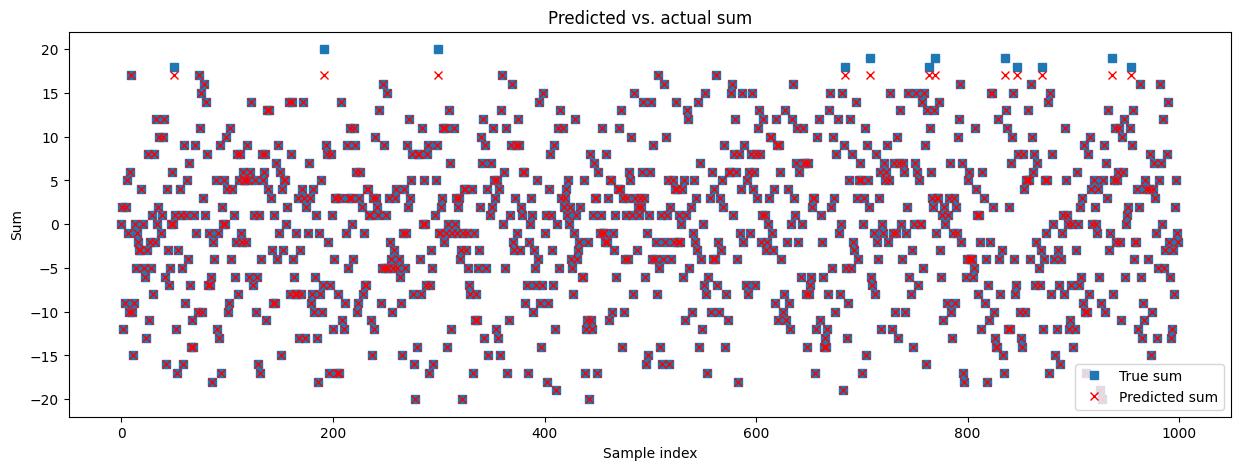

In [65]:
# some plots from the final model

data = torch.randint(low=-10,high=11,size=(N,2)).float()
labels = torch.sum(data,axis=1,keepdim=True)

# evaluate the model and compute accuracy
with torch.no_grad():
  predictions = Adder(data)


# true and predicted values
fig = plt.figure(figsize=(15,5))
plt.plot(labels,'s')
plt.plot(np.round(predictions.detach()),'rx')
plt.legend(['True sum','Predicted sum'])
plt.xlabel('Sample index')
plt.ylabel('Sum')
plt.title('Predicted vs. actual sum')
plt.show()